In [1]:
import numpy as np
import pandas as pd
import pyreadr
import scipy

In [10]:
perfomances_dt4 = pyreadr.read_r("/home/germanm2/n_policy_box/Data/files_rds/perfomances_dt4.rds")[None] # also works for RData
# Get base level L and create L_pct reduction (% reduction with baselevel)
# baselevel_n = perfomances_dt5[(perfomances_dt5['NMS'] == '1') & (perfomances_dt5['policy'] == 'fee_0')]['L'].to_numpy()[0]
# perfomances_dt5['L_pct_red'] = (1-(perfomances_dt5['L']/baselevel_n))*100
# Get base level P and create P_dlt (change in P with baselevel)
baselevel_p = perfomances_dt4[(perfomances_dt4['NMS'] == '1') & (perfomances_dt4['policy'] == 'fee_0')]['P'].to_numpy()[0]
perfomances_dt4['P_dlt'] = perfomances_dt4['P']-baselevel_p
# CalcGetulate base level Y_corn and create Y_corn_pct (% change with baselevel)
baselevel_y = perfomances_dt4[(perfomances_dt4['NMS'] == '1') & (perfomances_dt4['policy'] == 'fee_0')]['Y_corn'].to_numpy()[0]
perfomances_dt4['Y_corn_pct'] = perfomances_dt4['Y_corn']/baselevel_y

# #Keep change in Y >= 95%
perfomances_dt4 = perfomances_dt4[perfomances_dt4['Y_corn_pct'] >= 0.95]
perfomances_dt4 = perfomances_dt4[perfomances_dt4['Y_corn_pct'] <= 1.05]

# #Calculate ag-sector cost
perfomances_dt4['C'] = - perfomances_dt4['P_dlt'] - perfomances_dt4['G']
# perfomances_dt4['L_change'] = -perfomances_dt4['L_change']
perfomances_dt4[perfomances_dt4['policy_name'] == 'ratio']


,policy,NMS,Y_corn,L,N_fert,P,G,L_change,policy_val,policy_name,net_balance,P_dlt,Y_corn_pct,C
0,ratio_5,1,11104.888428,57.548171,189.023127,1422.368191,0.000000,0.0,5.0,ratio,0.000000,0.000000,1.000000,-0.000000
1,ratio_6,1,11096.094947,56.671351,185.646596,1397.510152,25.990523,-1.5,6.0,ratio,1.132485,-24.858039,0.999208,-1.132485
2,ratio_7,1,11071.588125,54.834948,179.023127,1374.579673,50.126476,-4.7,7.0,ratio,2.337958,-47.788518,0.997001,-2.337958
3,ratio_7.5,1,11060.654397,54.031788,175.646596,1364.062690,61.476309,-6.1,7.5,ratio,3.170808,-58.305501,0.996017,-3.170808
4,ratio_8,1,11060.654397,54.031788,175.646596,1351.767428,73.771570,-6.1,8.0,ratio,3.170808,-70.600762,0.996017,-3.170808
5,ratio_8.5,1,11044.266337,53.102136,171.846425,1341.700041,84.204748,-7.7,8.5,ratio,3.536599,-80.668149,0.994541,-3.536599
6,ratio_9,1,11044.266337,53.102136,171.846425,1329.670792,96.233998,-7.7,9.0,ratio,3.536599,-92.697399,0.994541,-3.536599
7,ratio_10,1,11027.835074,52.371524,169.023127,1307.264532,118.316189,-9.0,10.0,ratio,3.212530,-115.103659,0.993061,-3.212530
8,ratio_11,1,10991.663682,50.809808,161.846425,1289.589421,135.950997,-11.7,11.0,ratio,3.172227,-132.778770,0.989804,-3.172227
9,ratio_11.5,1,10991.663682,50.809808,161.846425,1278.260171,147.280247,-11.7,11.5,ratio,3.172227,-144.108020,0.989804,-3.172227


In [11]:
perfomances_dt4['L_change'] = -perfomances_dt4['L_change']
# perfomances_dt4 = perfomances_dt4[perfomances_dt4['L_change'] >= 0]
perfomances_dt4 = perfomances_dt4.sort_values(by=['policy_val'])
ratio_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'ratio') & (perfomances_dt4['NMS'] == '1')]
fee_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'fee') & (perfomances_dt4['NMS'] == '1')]
nred_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'nred') & (perfomances_dt4['NMS'] == '1')]
# subs_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'subs') & (perfomances_dt4['NMS'] == '1')]
shadow_1_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'shadow') & (perfomances_dt4['NMS'] == '1')]

ratio_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'ratio') & (perfomances_dt4['NMS'] == '2')]
fee_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'fee') & (perfomances_dt4['NMS'] == '2')]
nred_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'nred') & (perfomances_dt4['NMS'] == '2')]
# subs_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'subs') & (perfomances_dt4['NMS'] == '2')]
shadow_2_dt = perfomances_dt4[(perfomances_dt4['policy_name'] == 'shadow') & (perfomances_dt4['NMS'] == '2')]

perfomances_dt4[perfomances_dt4['policy_name'] == 'fee']
ratio_1_dt

,policy,NMS,Y_corn,L,N_fert,P,G,L_change,policy_val,policy_name,net_balance,P_dlt,Y_corn_pct,C
0,ratio_5,1,11104.888428,57.548171,189.023127,1422.368191,0.000000,-0.0,5.0,ratio,0.000000,0.000000,1.000000,-0.000000
1,ratio_6,1,11096.094947,56.671351,185.646596,1397.510152,25.990523,1.5,6.0,ratio,1.132485,-24.858039,0.999208,-1.132485
2,ratio_7,1,11071.588125,54.834948,179.023127,1374.579673,50.126476,4.7,7.0,ratio,2.337958,-47.788518,0.997001,-2.337958
3,ratio_7.5,1,11060.654397,54.031788,175.646596,1364.062690,61.476309,6.1,7.5,ratio,3.170808,-58.305501,0.996017,-3.170808
4,ratio_8,1,11060.654397,54.031788,175.646596,1351.767428,73.771570,6.1,8.0,ratio,3.170808,-70.600762,0.996017,-3.170808
5,ratio_8.5,1,11044.266337,53.102136,171.846425,1341.700041,84.204748,7.7,8.5,ratio,3.536599,-80.668149,0.994541,-3.536599
6,ratio_9,1,11044.266337,53.102136,171.846425,1329.670792,96.233998,7.7,9.0,ratio,3.536599,-92.697399,0.994541,-3.536599
7,ratio_10,1,11027.835074,52.371524,169.023127,1307.264532,118.316189,9.0,10.0,ratio,3.212530,-115.103659,0.993061,-3.212530
8,ratio_11,1,10991.663682,50.809808,161.846425,1289.589421,135.950997,11.7,11.0,ratio,3.172227,-132.778770,0.989804,-3.172227
9,ratio_11.5,1,10991.663682,50.809808,161.846425,1278.260171,147.280247,11.7,11.5,ratio,3.172227,-144.108020,0.989804,-3.172227


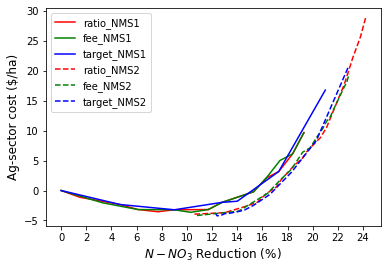

In [13]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
fig, ax = plt.subplots()
ax.plot(ratio_1_dt['L_change'], ratio_1_dt['C'], color = 'r', label = 'ratio_NMS1')
ax.plot(fee_1_dt['L_change'], fee_1_dt['C'], color = 'g', label = 'fee_NMS1')
ax.plot(nred_1_dt['L_change'], nred_1_dt['C'], color = 'b', label = 'target_NMS1')
# ax.plot(shadow_1_dt['L_change'], shadow_1_dt['C'], color = 'y', label = 'shadow_NMS1')
ax.plot(ratio_2_dt['L_change'], ratio_2_dt['C'], linestyle='dashed', color = 'r',  label = 'ratio_NMS2')
ax.plot(fee_2_dt['L_change'], fee_2_dt['C'], linestyle='dashed', color = 'g', label = 'fee_NMS2')
ax.plot(nred_2_dt['L_change'], nred_2_dt['C'], linestyle='dashed', color = 'b', label = 'target_NMS2')
# ax.plot(shadow_2_dt['L_change'], shadow_2_dt['C'], linestyle='dashed', color = 'y', label = 'shadow_NMS2')

plt.legend()

plt.xlabel("$N-NO_3$ Reduction (%)", size = 12)
plt.ylabel("Ag-sector cost ($/ha)", size = 12)
ax.set_xticks((np.arange(0, 25, 2)))
plot_file_name = "/home/germanm2/n_policy_box/Data/figures/ag_sector_cost.png"
plt.savefig(plot_file_name, dpi=300)